# Final Project

## Intro

The task given to us by the ficional telecommunications company, aptly named Telecom, is to look at the data they have on current customers and customers who have left the company, and to create a machine learning model that can predict if a customer is likely to leave.  Telecom can then offer the customer a discount to entice them to stay.

This project will be separated into preprocessing, exploratory data analysis, and model training and evaluation.  

Preprocessing is where we will combine the individual dataframes into a single all encompassing dataframe.  The dataframe null values will then be replaced with the appropriate values, the column names and values will be standardized.

In the exploratory data analysis section the data will be split into churn and current customer dataframes.  The percentages of each column will be evaluated to see if there are unique characteristics to churn customers.

Model training and evaluation will be where we use a parameter dictionary and GridSearchCV to determine the optimal settings, and then evaluate the performance of the machine learning model.

In [1]:
# importing libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so

import datetime as dt
import warnings

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix
from sklearn.linear_model import LogisticRegression

import lightgbm as lgbm

In [2]:
# reading csvs into dataframes

contract = pd.read_csv('D:/Downloads/DataSets/final_provider/contract.csv')
internet = pd.read_csv('D:/Downloads/DataSets/final_provider/internet.csv')
personal = pd.read_csv('D:/Downloads/DataSets/final_provider/personal.csv')
phone = pd.read_csv('D:/Downloads/DataSets/final_provider/phone.csv')

## DataFrames

In [3]:
# lookin at null counts, column names, and data types

contract.info()
print()

internet.info()
print()

personal.info()
print()

phone.info()
print()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-n

In [4]:
# displaying the dataframes

print('Contract')
display(contract)

print('Internet')
display(internet)

print('Personal')
display(personal)

print('Phone')
display(phone)

Contract


,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65
...,...,...,...,...,...,...,...,...
7038,6840-RESVB,2018-02-01,No,One year,Yes,Mailed check,84.80,1990.5
7039,2234-XADUH,2014-02-01,No,One year,Yes,Credit card (automatic),103.20,7362.9
7040,4801-JZAZL,2019-03-01,No,Month-to-month,Yes,Electronic check,29.60,346.45
7041,8361-LTMKD,2019-07-01,2019-11-01 00:00:00,Month-to-month,Yes,Mailed check,74.40,306.6


Internet


,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...
5512,6840-RESVB,DSL,Yes,No,Yes,Yes,Yes,Yes
5513,2234-XADUH,Fiber optic,No,Yes,Yes,No,Yes,Yes
5514,4801-JZAZL,DSL,Yes,No,No,No,No,No
5515,8361-LTMKD,Fiber optic,No,No,No,No,No,No


Personal


,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No
...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes
7039,2234-XADUH,Female,0,Yes,Yes
7040,4801-JZAZL,Female,0,Yes,Yes
7041,8361-LTMKD,Male,1,Yes,No


Phone


,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes
...,...,...
6356,2569-WGERO,No
6357,6840-RESVB,Yes
6358,2234-XADUH,Yes
6359,8361-LTMKD,Yes


## Preprocessing

In [5]:
# merging the separate dataframes into one dataframe

combined = pd.merge(contract, internet, on ='customerID', how= 'left')
combined = pd.merge(combined, personal, on ='customerID', how= 'left')
combined = pd.merge(combined, phone, on ='customerID', how= 'left')

combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   InternetService   5517 non-null   object 
 9   OnlineSecurity    5517 non-null   object 
 10  OnlineBackup      5517 non-null   object 
 11  DeviceProtection  5517 non-null   object 
 12  TechSupport       5517 non-null   object 
 13  StreamingTV       5517 non-null   object 
 14  StreamingMovies   5517 non-null   object 
 15  gender            7043 non-null   object 
 16  SeniorCitizen     7043 non-null   int64  


In [6]:
combined['customerID'].duplicated().value_counts()

customerID
False    7043
Name: count, dtype: int64

There are no duplicate customer Ids.

In [7]:
# converting the column names to lowercase

combined.columns = map(str.lower, combined.columns)

In [8]:
# renaming the column names to add underscores and get rid of any white spaces

col_rename_dict = {'customerid':'customer_id', 'begindate':'begin_date', 'enddate':'end_date', 'type':'type', 'paperlessbilling':'paperless_billing',
               'paymentmethod':'payment_method', 'monthlycharges':'monthly_charges', 'totalcharges':'total_charges',
               'internetservice':'internet_service', 'onlinesecurity':'online_security', 'onlinebackup':'online_backup',
               'deviceprotection':'device_protection', 'techsupport':'tech_support', 'streamingtv':'streaming_tv', 'streamingmovies':'streaming_movies',
               'gender':'gender', 'seniorcitizen':'senior_citizen', 'partner':'partner', 'dependents':'dependents', 'multiplelines':'multiple_lines'}

combined = combined.rename(columns=col_rename_dict)

In [9]:
# function that will be applied to the end_date column that will be used to create a churn column
# that is either 1 if the customer left the company or 0 if they did not

def left_co(data):
    if data == 'No':
        return 0
    else:
        return 1

In [10]:
combined['churn'] = combined['end_date'].apply(left_co)

In [11]:
# function that will be used replace binary columns with a 1 or 0
# it will also replace null values with 0, because after merging dataframes the data would only be null 
# if the customer did not have a plan in place

def bi_replace(data):
    if data == 'Yes':
        return 1
    else:
        return 0

In [12]:
bi_col = ['paperless_billing','online_backup', 'online_security','device_protection', 'tech_support', 'streaming_tv', 
    'streaming_movies', 'partner', 'dependents','multiple_lines']

In [13]:
combined[bi_col] = combined[bi_col].map(bi_replace)

In [14]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7043 non-null   object 
 1   begin_date         7043 non-null   object 
 2   end_date           7043 non-null   object 
 3   type               7043 non-null   object 
 4   paperless_billing  7043 non-null   int64  
 5   payment_method     7043 non-null   object 
 6   monthly_charges    7043 non-null   float64
 7   total_charges      7043 non-null   object 
 8   internet_service   5517 non-null   object 
 9   online_security    7043 non-null   int64  
 10  online_backup      7043 non-null   int64  
 11  device_protection  7043 non-null   int64  
 12  tech_support       7043 non-null   int64  
 13  streaming_tv       7043 non-null   int64  
 14  streaming_movies   7043 non-null   int64  
 15  gender             7043 non-null   object 
 16  senior_citizen     7043 

In [15]:
combined['gender'].value_counts()

gender
Male      3555
Female    3488
Name: count, dtype: int64

There are only two options in the gender column, so they can also be turned into a binary column.

In [16]:
""" 
function that will be applied to the gender column to create a binary is_male column
 that is either 1 or 0
"""

def gender_replace(data):
    if data == 'Male':
        return 1
    else:
        return 0

In [17]:
combined['is_male'] = combined['gender'].apply(gender_replace)

In [18]:
"""
combining the dataframes created null values where customers did not have plans.
this will fill the null values with a more accurate descriptor
"""
combined = combined.fillna('no_plan')

In [19]:
"""
dictionary that will be used to replace values with lower case letters as well as replace the empty spaces
with an underscore so after One Hot Encoding the feature names will not have empty spaces
"""

row_rename_dict = {'Month-to-month': 'month_to_month', 'Two year': 'two_year', 'One year': 'one_year', 'Electronic check': 'electronic_check',
    'Mailed check': 'mailed_check', 'Bank transfer (automatic)': 'bank_transfer(automatic)', 'Credit card (automatic)': 'credit_card(automatic)',
    'Fiber optic': 'fiber_optic', 'DSL': 'dsl', 'None': 'no_plan'}

In [20]:
cat_col = ['type', 'payment_method', 'internet_service']

combined[cat_col] = combined[cat_col].replace(row_rename_dict)

In [21]:
combined['churn'].value_counts()

churn
0    5174
1    1869
Name: count, dtype: int64

There is a disproportionate amount of customers that stayed with the company in the data set.

In [22]:
combined[combined['total_charges'] == ' ']

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,internet_service,online_security,...,tech_support,streaming_tv,streaming_movies,gender,senior_citizen,partner,dependents,multiple_lines,churn,is_male
488,4472-LVYGI,2020-02-01,No,two_year,1,bank_transfer(automatic),52.55,,dsl,1,...,1,1,0,Female,0,1,1,0,0,0
753,3115-CZMZD,2020-02-01,No,two_year,0,mailed_check,20.25,,no_plan,0,...,0,0,0,Male,0,0,1,0,0,1
936,5709-LVOEQ,2020-02-01,No,two_year,0,mailed_check,80.85,,dsl,1,...,0,1,1,Female,0,1,1,0,0,0
1082,4367-NUYAO,2020-02-01,No,two_year,0,mailed_check,25.75,,no_plan,0,...,0,0,0,Male,0,1,1,1,0,1
1340,1371-DWPAZ,2020-02-01,No,two_year,0,credit_card(automatic),56.05,,dsl,1,...,1,1,0,Female,0,1,1,0,0,0
3331,7644-OMVMY,2020-02-01,No,two_year,0,mailed_check,19.85,,no_plan,0,...,0,0,0,Male,0,1,1,0,0,1
3826,3213-VVOLG,2020-02-01,No,two_year,0,mailed_check,25.35,,no_plan,0,...,0,0,0,Male,0,1,1,1,0,1
4380,2520-SGTTA,2020-02-01,No,two_year,0,mailed_check,20.00,,no_plan,0,...,0,0,0,Female,0,1,1,0,0,0
5218,2923-ARZLG,2020-02-01,No,one_year,1,mailed_check,19.70,,no_plan,0,...,0,0,0,Male,0,1,1,0,0,1
6670,4075-WKNIU,2020-02-01,No,two_year,0,mailed_check,73.35,,dsl,0,...,1,1,0,Female,0,1,1,1,0,0


There are 11 rows where the total charges are an empty string.  Their begin date is also after the end date of their contract.  Leaving them in will prevent the computer from changing the data type to a float.  It will be best to drop these rows. 

In [23]:
combined = combined[combined['total_charges'] != ' ']

In [24]:
combined['total_charges'] = combined['total_charges'].astype('float64')

In [25]:
combined['end_date'].value_counts()

end_date
No                     5163
2019-11-01 00:00:00     485
2019-12-01 00:00:00     466
2020-01-01 00:00:00     460
2019-10-01 00:00:00     458
Name: count, dtype: int64

The latest date is 2020-01-01, so that will replace the *'No'* value in the end_date column.

In [26]:
# it will be easier to split the dataframe into current customer and dropped customer dataframes before the 'No' values are changed to dates

current = combined[combined['end_date'] == 'No']

dropped = combined[combined['end_date'] != 'No']

In [27]:
combined['begin_date'] = pd.to_datetime(combined['begin_date'])
combined['end_date'] = combined['end_date'].replace(to_replace='No', value= '2020-01-01 00:00:00')
combined['end_date'] = pd.to_datetime(combined['end_date'])

In [28]:
"""
creating a column that will be the total number of days with the company
once that is created the begin and end dates can be dropped
"""

combined['time_w_company'] = (combined['end_date'] - combined['begin_date']).dt.days

The customer_id, gender, begin_date, and end_date columns can now be dropped.  They will not help the machine learning algorithm.

In [29]:
drop_cols = ['customer_id','begin_date', 'gender','end_date']

In [30]:
combined = combined.drop(labels=drop_cols, axis= 1)

In [31]:
combined[combined['time_w_company'] == 0]

,type,paperless_billing,payment_method,monthly_charges,total_charges,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,senior_citizen,partner,dependents,multiple_lines,churn,is_male,time_w_company
0,month_to_month,1,electronic_check,29.85,29.85,dsl,0,1,0,0,0,0,0,1,0,0,0,0,0
33,month_to_month,0,bank_transfer(automatic),20.20,20.20,no_plan,0,0,0,0,0,0,0,0,0,0,0,1,0
34,month_to_month,0,bank_transfer(automatic),45.25,45.25,dsl,0,0,0,0,0,0,1,0,0,0,0,1,0
70,month_to_month,0,mailed_check,49.05,49.05,dsl,0,0,0,1,0,0,0,0,0,0,0,1,0
91,month_to_month,0,electronic_check,74.70,74.70,fiber_optic,0,0,0,1,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6840,month_to_month,1,mailed_check,19.30,19.30,no_plan,0,0,0,0,0,0,0,0,1,0,0,1,0
6845,month_to_month,1,mailed_check,45.85,45.85,dsl,0,0,0,0,0,0,1,0,0,0,0,1,0
6909,month_to_month,1,mailed_check,53.55,53.55,dsl,1,1,0,0,0,0,0,1,0,0,0,0,0
6979,month_to_month,0,mailed_check,24.20,24.20,dsl,0,0,0,0,0,0,0,0,1,0,0,1,0


There are some rows where the time with company is 0.  It will not be useful to use rows where the customer had less than a month with the company to predict churn since the billing cycle is every month.

In [32]:
combined = combined[combined['time_w_company'] > 30]

In [33]:
# descriptive stats of numeric columns

numeric = ['monthly_charges', 'total_charges', 'time_w_company']
combined[numeric].describe()

,monthly_charges,total_charges,time_w_company
count,6617.000000,6617.000000,6617.000000
mean,65.977444,2423.618022,1024.460934
std,30.039139,2264.254731,724.819877
min,18.250000,19.100000,31.000000
25%,39.850000,531.550000,334.000000
50%,71.850000,1553.200000,944.000000
75%,90.550000,3985.350000,1706.000000
max,118.750000,8684.800000,2191.000000


There are quite a few outliers in the total_charges column. The 75% quartile is at 3985, while the max is at 8684.  It will help the machine learning algorithm to drop some of those outliers. 

In [34]:
combined = combined[(combined['total_charges'] <= 7000)]

## Exploratory Data Analysis

In [35]:
"""
this cell will take the current and dropped dataframes, turn the categorical columns into two multi index series of value_counts, 
and then convert the values into percentages so they can be compared 
"""

drop_cols = ['customer_id','begin_date', 'end_date','monthly_charges', 'total_charges','gender','churn']
cat_features = ['internet_service','payment_method', 'type']

current_cat = current.drop(drop_cols, axis=1)
dropped_cat =  dropped.drop(drop_cols, axis=1)

current_cat_vc = current_cat.stack().groupby(level=1).value_counts()
dropped_cat_vc = dropped_cat.stack().groupby(level=1).value_counts()

"""
the sum of the value_counts changed when creating each series, so the value_counts of the original dataframe has to be
used to accurately change into a percentage
the sum of the value_counts of any individual column can be used
"""

current_cat_vc = (current_cat_vc /(current['type'].value_counts().sum())*100)
dropped_cat_vc = (dropped_cat_vc /(dropped['type'].value_counts().sum())*100)

comb_cat = pd.concat([current_cat_vc, dropped_cat_vc], axis = 1)
comb_cat.columns = ['% of current customers', '% of dropped customers']

In [36]:
display(comb_cat)

% of current customers  \
dependents        0                                      65.659500   
                  1                                      34.340500   
device_protection 0                                      63.722642   
                  1                                      36.277358   
internet_service  dsl                                    37.904319   
                  fiber_optic                            34.844083   
                  no_plan                                27.251598   
is_male           1                                      50.726322   
                  0                                      49.273678   
multiple_lines    0                                      58.996707   
                  1                                      41.003293   
online_backup     0                                      63.160953   
                  1                                      36.839047   
online_security   0                                      66.686035   
                  1                                      33.313965   
paperless_billing 1                                      53.612241   
                  0                                      46.387759   
partner           1                                      52.760023   
                  0                                      47.239977   
payment_method    mailed_check                           25.101685   
                  electronic_check                       25.062948   
                  credit_card(automatic)                 24.966105   
                  bank_transfer(automatic)               24.869262   
senior_citizen    0                                      87.100523   
                  1                                      12.899477   
streaming_movies  0                                      62.947899   
                  1                                      37.052101   
streaming_tv      0                                      63.412745   
                  1                                      36.587255   
tech_support      0                                      66.492349   
                  1                                      33.507651   
type              month_to_month                         42.998257   
                  two_year                               31.706372   
                  one_year                               25.295371   

                                            % of dropped customers  
dependents        0                                      82.557517  
                  1                                      17.442483  
device_protection 0                                      70.840021  
                  1                                      29.159979  
internet_service  dsl                                    24.558587  
                  fiber_optic                            69.395399  
                  no_plan                                 6.046014  
is_male           1                                      49.759230  
                  0                                      50.240770  
multiple_lines    0                                      54.521134  
                  1                                      45.478866  
online_backup     0                                      72.017121  
                  1                                      27.982879  
online_security   0                                      84.216158  
                  1                                      15.783842  
paperless_billing 1                                      74.906367  
                  0                                      25.093633  
partner           1                                      35.794543  
                  0                                      64.205457  
payment_method    mailed_check                           16.479401  
                  electronic_check                       57.303371  
                  credit_card(automatic)                 12.413055  
      

There are a few areas that can identify customers that will likely leave the company.

- 83% of customers who leave have no dependents (vs. 66% of current customers)
- 69% of churn customers use fiber optic (it is split fairly equally between the three plans with current customers)
- 75% use paperless billing (again, an equal split for current customers)
- 57% pay by electronic check (equal split for current customers)
- 83% do not use tech support (65% of current customers do not)
- 89% pay month to month (only 43% of current customers pay month to month)

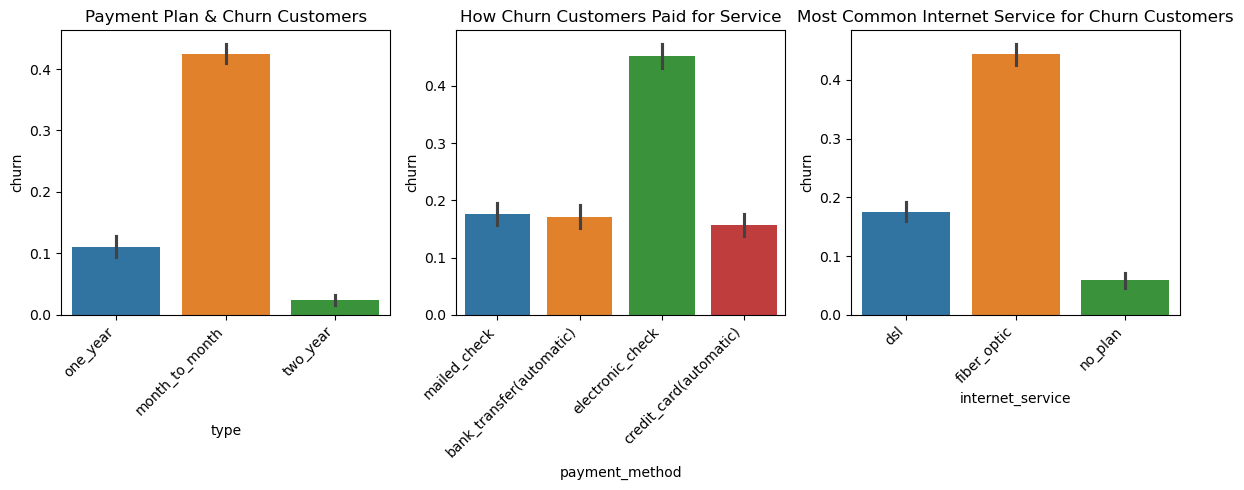

In [37]:
# creating a barplot of the three categorical columns

warnings.filterwarnings('ignore')

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize= (12,5))

sns.barplot(data=combined, x= 'type', y='churn', hue='type', ax= ax1)
sns.barplot(data=combined, x= 'payment_method', y='churn', hue='payment_method', ax= ax2)
sns.barplot(data=combined, x= 'internet_service', y='churn', hue='internet_service', ax=ax3)

ax1.set_xticklabels(ax1.get_xticklabels(), rotation= 45, ha='right')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation= 45, ha='right')
ax3.set_xticklabels(ax3.get_xticklabels(), rotation= 45, ha='right')

ax1.set_title('Payment Plan & Churn Customers')
ax2.set_title('How Churn Customers Paid for Service')
ax3.set_title('Most Common Internet Service for Churn Customers')


plt.tight_layout()
plt.show()

These three graphs help to reaffirm some of the findings of the previous dataframe.  Churn customers pay month to month, pay via electronic check, and use fiber optic. 

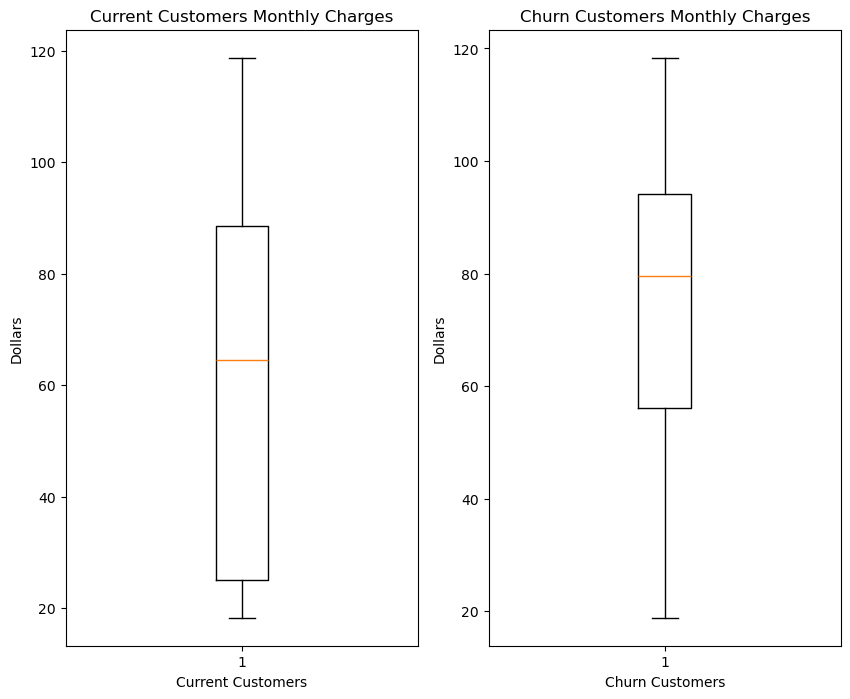

In [38]:
# creating a boxplot of current and dropped customers monthly charges

fig, axs = plt.subplots(1,2, figsize=(10,8))

axs[0].boxplot(current['monthly_charges'])
axs[1].boxplot(dropped['monthly_charges'])

axs[0].set_title('Current Customers Monthly Charges')
axs[1].set_title('Churn Customers Monthly Charges')

axs[0].set_xlabel('Current Customers')
axs[1].set_xlabel('Churn Customers')

axs[0].set_ylabel('Dollars')
axs[1].set_ylabel('Dollars')
plt.show()

Customers who have left the company had noticably higher monthly charges.

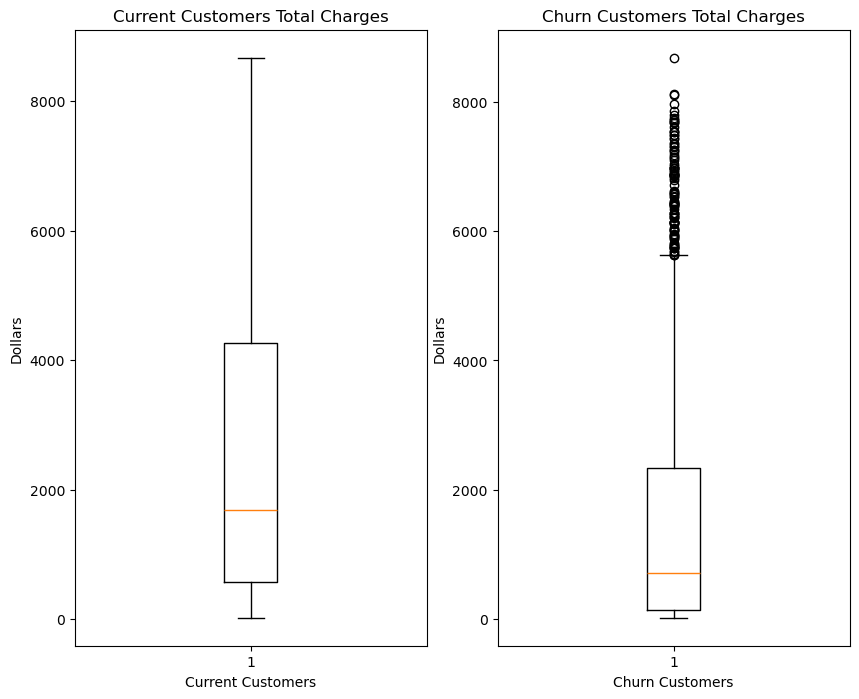

In [39]:
# creating two boxplots of current and dropped customers total charges

fig, axs = plt.subplots(1,2, figsize=(10,8))

axs[0].boxplot(current['total_charges'])
axs[1].boxplot(dropped['total_charges'], showfliers= True)

axs[0].set_title('Current Customers Total Charges')
axs[1].set_title('Churn Customers Total Charges')

axs[0].set_xlabel('Current Customers')
axs[1].set_xlabel('Churn Customers')

axs[0].set_ylabel('Dollars')
axs[1].set_ylabel('Dollars')
plt.show()

The total charges for customers that left the company are lower.  This is probably just because the customers who stay with the company have accrued more charges over the billing year, while dropped customers could pay for a month or two and then leave the company.

## Scaling and Splitting Data

In [40]:
# setting the random state

r_state = 12345

In [41]:
# function that will take in features and target and upsample them so the values are more balanced

def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)

    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state= r_state
    )

    return features_upsampled, target_upsampled

In [42]:
# function that will take in features and target and downsample them so the values are more balanced

def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state= r_state)]
        + [features_ones]
    )
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state= r_state)]
        + [target_ones]
    )

    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state= r_state
    )

    return features_downsampled, target_downsampled

In [43]:
# converting columns with object type to category type so lightgbm can one hot encode them

for c in combined.columns:
    col_type = combined[c].dtype
    if col_type == 'object' or col_type.name == 'category':
        combined[c] = combined[c].astype('category')

In [44]:
# splitting data into train, validate, and final test dataframes

warnings.filterwarnings('ignore')

X = combined.drop(['churn'], axis = 1)
y= combined['churn']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size= 0.2, random_state= r_state,stratify= y)
X_test, X_final, y_test, y_final = train_test_split(X_valid, y_valid, test_size= 0.5, random_state= r_state, stratify= y_valid)

In [45]:
# creating a scaler to scale numeric data so it varies between 0 to 1 and does not add extra weight over binary columns
 
warnings.filterwarnings('ignore')


scaler= StandardScaler()
scaler.fit(X_train[numeric])

X_train[numeric] = scaler.transform(X_train[numeric])
X_test[numeric] = scaler.transform(X_test[numeric])
X_final[numeric] = scaler.transform(X_final[numeric])

In [46]:
# downsampling the training data

X_downsampled, y_downsampled = downsample(X_train, y_train, 0.5)

## Model Training and Evaluation

In [47]:
# setting string to print with score

roc_string= 'ROC AUC Score: '

In [48]:
# setting a parameter grid to be used with GridSearchCV

param_grid = {
    'learning_rate': [0.1, 0.5, 0.9],
    'n_estimators': list(range(1,3001, 1000)),
    'num_leaves': list(range(1,201,100)),
    'min_data_in_leaf': list(range(50, 126, 25)),
    'min_data_per_group': list(range(1, 101, 50)),
    'max_bin': list(range(200, 351, 50))
    }

In [49]:
# testing parameter dictionary with GridSearchCV to find optimal settings

warnings.filterwarnings('ignore')

comb_lgbm = lgbm.LGBMClassifier(device='cpu',objective= 'binary', metric= 'auc', is_unbalance= True, early_stopping_rounds= 5, 
                               verbosity= -1, categorical_feature= cat_features, feature_name= 'auto', random_state= r_state)

gsearch= GridSearchCV(estimator= comb_lgbm, param_grid= param_grid, cv= 10)

lgbm_model= gsearch.fit(X= X_downsampled, y= y_downsampled, eval_set= (X_test, y_test))

print(lgbm_model.best_params_, lgbm_model.best_score_)

lgbm_predict = lgbm_model.predict_proba(X_final)[:,1]
lgbm_roc_auc = roc_auc_score(y_final, lgbm_predict)

print(roc_string, lgbm_roc_auc)

{'learning_rate': 0.5, 'max_bin': 200, 'min_data_in_leaf': 75, 'min_data_per_group': 1, 'n_estimators': 1001, 'num_leaves': 101} 0.7859690891415194
ROC AUC Score:  0.8905825496342739


In [50]:
# setting up a dummy model to compare to the lgbm model

noskill_probabilities = [0 for number in range(len(y_final))]

In [51]:
#creating false/true positive variables to add to the ROC AUC curve

falsepos_noskill, truepos_noskill, _ = roc_curve(y_final, noskill_probabilities)

falsepos_lgbm, truepos_lgbm, _ = roc_curve(y_final, lgbm_predict)

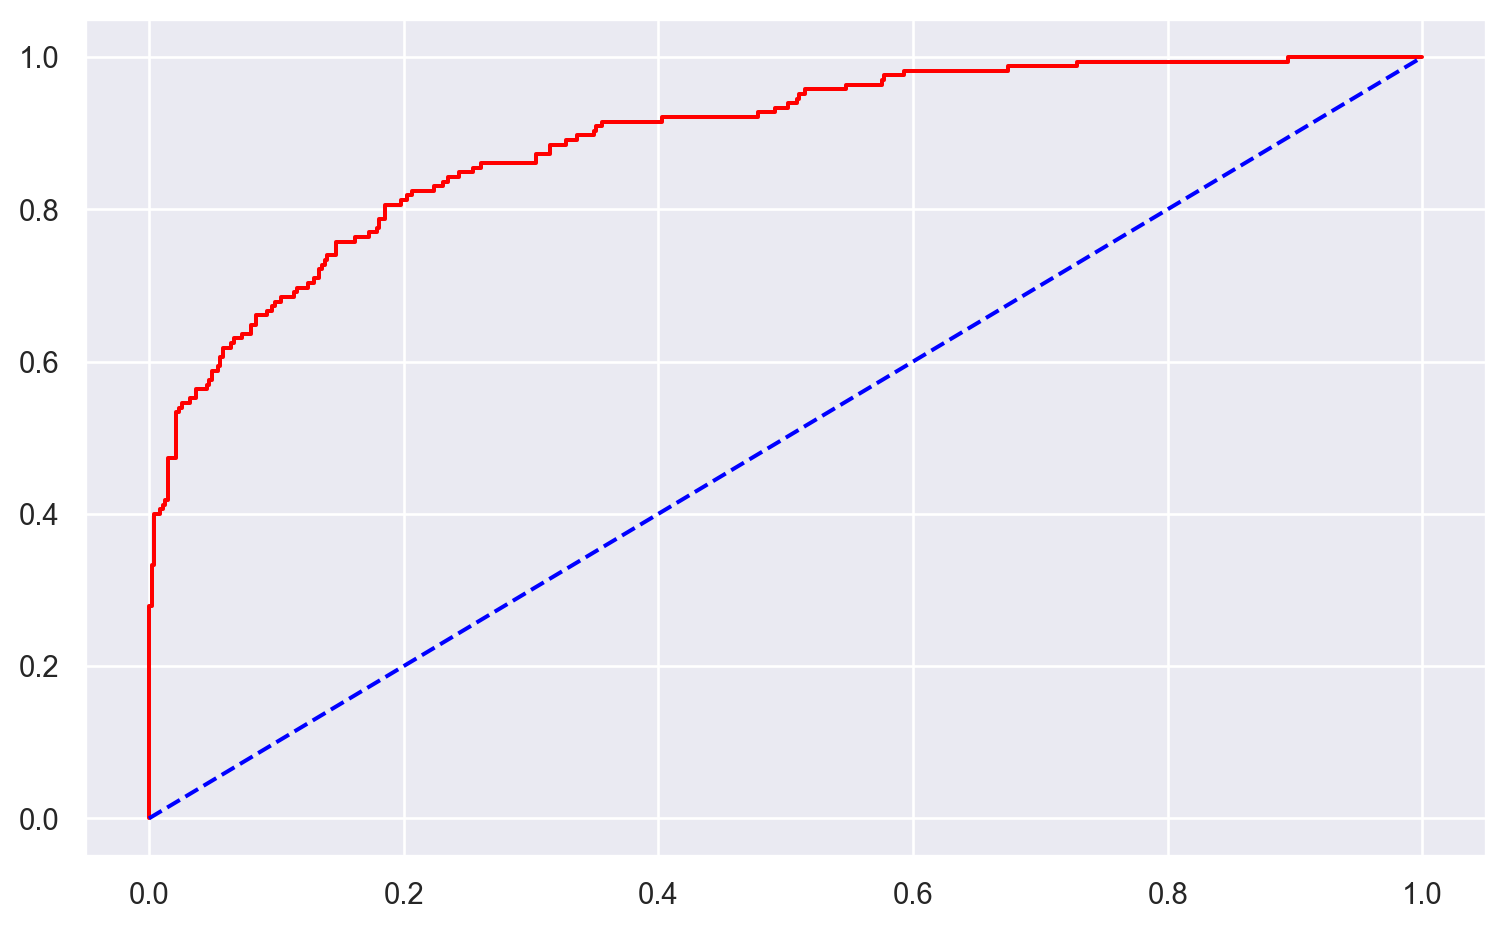

In [52]:
#plotting ROC AUC curve

(so.Plot()
   .add(so.Line(color = 'red'),x =falsepos_lgbm, y = truepos_lgbm)
   .add(so.Line(color = 'blue',linestyle = 'dashed'),x = falsepos_noskill, y = truepos_noskill)
   .layout(size = (8,5))
)

Here we can see that the machine learning model significantly outperforms the dummy model. 

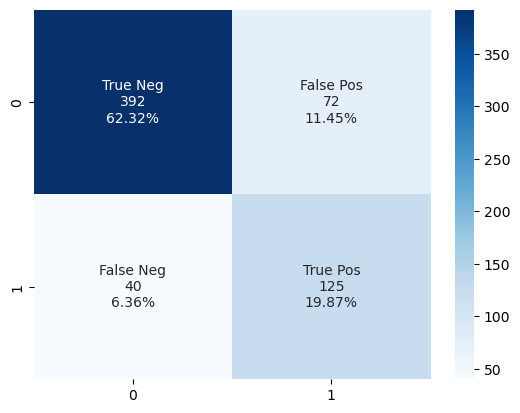

In [53]:
# creating a confusion matrix for the model

lgbm_true_pred = lgbm_model.predict(X_final)
cf_matrix = confusion_matrix(y_final, lgbm_true_pred)

group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)


sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

plt.show()

The machine learning model primarily predicts the customer will not leave the company.  This is in line with the data, almost 3 times as many entries were customers who stayed with Telecom.  The lowest percentage prediction was a false negative. That is, it predicted a customer would stay when they actually ended up leaving the company.  It is not good to have false negatives, but it is good that false negatives were the smallest percentage of predictions.  A false positive prediction would mean that the machine learning model predicted a customer would leave, when in reality the customer was loyal.  The end result of this prediction would be that a loyal customer was offered a discount on their bills, which is not necessarily a bad thing.
With a ROC AUC score of 0.89, and a false negative prediction of 6%, it is safe to say this is model can be employed to help reduce customer churn.

## Conclusion

The best ROC AUC score was achieved with LightGBM and was .89. It also had a false negative prediction of 6%.

A likely churn customer has several determining factors. 

Churn Customers:
- Have 0 dependents
- Use fiber optic 
- Use paperless billing
- Do not use tech support
- Pay month to month

The customers with higher monthly charges are likely to leave the company, so it is reasonable to believe that offering a discount will help retain those customers.  Given the scores of the machine learning model it is also reasonable to believe that we can predict which customers will leave the company.  Combining the model predictions and offering discounts is likely to increase customer retention. 